In [ ]:
!pip install tensorflow==2.16.0rc0

In [ ]:
!PYTHONHASHSEED=0

In [1]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, random as python_random
from IPython.display import Javascript
from time import time
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from matplotlib import pyplot as plt
from keras.regularizers import l2

In [ ]:
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

# Loading the CIFAR-10 dataset

In [2]:
t0 = time()
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print("Datasets downloaded in %0.2f seconds" % (time() - t0))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Datasets downloaded in 18.78 seconds


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [3]:
def analysis(dataset):
  unique, counts = np.unique(dataset, return_counts = True)
  for label, count in zip(unique, counts):
      print(f"Category {label + 1} has {count} images")

print('Categories in training set:')
analysis(y_train)
print('\nCategories in test set:')
analysis(y_test)

Categories in training set:
Category 1 has 5000 images
Category 2 has 5000 images
Category 3 has 5000 images
Category 4 has 5000 images
Category 5 has 5000 images
Category 6 has 5000 images
Category 7 has 5000 images
Category 8 has 5000 images
Category 9 has 5000 images
Category 10 has 5000 images

Categories in test set:
Category 1 has 1000 images
Category 2 has 1000 images
Category 3 has 1000 images
Category 4 has 1000 images
Category 5 has 1000 images
Category 6 has 1000 images
Category 7 has 1000 images
Category 8 has 1000 images
Category 9 has 1000 images
Category 10 has 1000 images


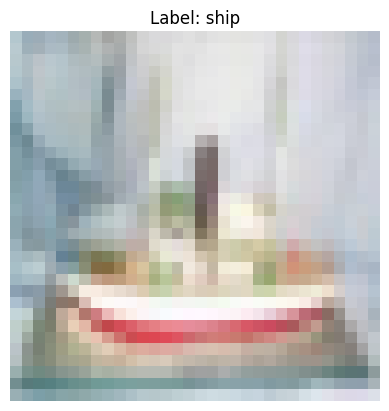

In [ ]:
def display_image(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

index = np.random.randint(0, len(X_train))
display_image(X_train[index], labels[y_train[index][0]])

# Data pre-processing

In [ ]:
X_train = X_train.astype('float32')/255.0 # Take values in [0,1]
X_test = X_test.astype('float32')/255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train[0], y_train[0]

(array([[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],
 
        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],
 
        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],
 
        ...,
 
        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333

In [ ]:
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 500})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# Model training

In [ ]:
kernel = (3, 3)
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = kernel, input_shape = (32, 32, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 256, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 256, kernel_size = kernel, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

<IPython.core.display.Javascript object>

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │              

 Total params: 1,210,282 (4.62 MB)

 Trainable params: 1,208,362 (4.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
new_data = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    horizontal_flip = True)

batch_size = 32
train_data = new_data.flow(X_train, y_train, batch_size = batch_size)
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

history = model.fit(train_data,
                    epochs = 40,
                    callbacks = [callback],
                    validation_data = (X_test, y_test))

<IPython.core.display.Javascript object>

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.3611 - loss: 1.8383 - val_accuracy: 0.5375 - val_loss: 1.3744
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.5771 - loss: 1.2455 - val_accuracy: 0.6043 - val_loss: 1.1571
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.6369 - loss: 1.0607 - val_accuracy: 0.6042 - val_loss: 1.2606
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6792 - loss: 0.9585 - val_accuracy: 0.6821 - val_loss: 0.9805
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.7137 - loss: 0.8656 - val_accuracy: 0.6633 - val_loss: 1.1216
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7316 - loss: 0.8152 - val_accuracy: 0.6953 - val_loss: 0.9738
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7447 - loss: 0.7703 - val_accuracy: 0.7173 - val_loss: 0.8715
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7592 - loss: 0.73

# Evaluation

<IPython.core.display.Javascript object>

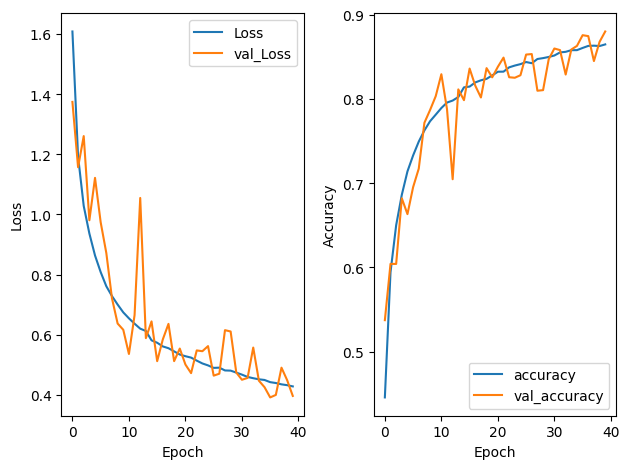

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Accuracy on test set : {evaluation[1] * 100:.2f}%')
print(f'Loss on test set : {evaluation[0] * 100:.2f}%')

<IPython.core.display.Javascript object>

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8806 - loss: 0.3859
Accuracy on test set : 87.56%
Loss on test set : 39.11%


# Testing the prediction

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 6504 is a(n) horse and the model predicts that it's a(n) horse


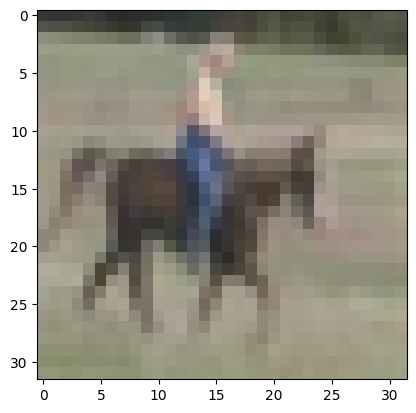

In [ ]:
index = np.random.randint(0, len(X_test))
image = X_test[index]
prediction = np.argmax(model.predict(image.reshape(1, 32, 32, 3)))
plt.imshow(image)

print(f"Image {index} is a(n) {labels[np.argmax(y_test[index])]} and the model predicts that it's a(n) {labels[prediction]}")

# Final model

In [ ]:
model.save('cnn_fdl.keras')

<IPython.core.display.Javascript object>